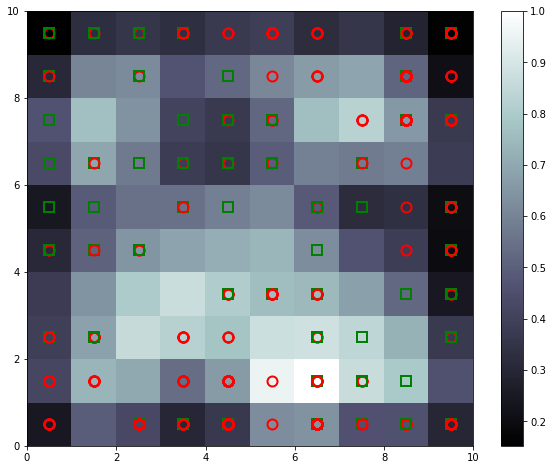

In [7]:
# Mega Case Study - Make a Hybrid Deep Learning Model
import sys
sys.path.insert(0,'./Self_Organizing_Maps/')
from minisom import MiniSom


# Part 1 - Identify the Frauds with the Self-Organizing Map

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('./Mega_Case_Study/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 500)

# Visualizing the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()


In [8]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(7,2)], mappings[(6,2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [9]:
frauds.shape

(11, 15)

In [16]:
for i in range(dataset.shape[0]):
    a=dataset.iloc[i,:]
    break

In [18]:
for i in a:
    print i

15776156.0
1.0
22.08
11.46
2.0
4.0
4.0
1.585
0.0
0.0
0.0
1.0
2.0
100.0
1213.0
0.0
